# **Import libraries and load the dataset**


In [1]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
#to upload the file
uploaded = files.upload()

Saving supermarket_sales.csv to supermarket_sales.csv


# **Explore the dataset**

In [2]:
data = pd.read_csv("supermarket_sales.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
data.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [6]:
data['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

# **Date and time processing**

In [7]:
#Convert strings to datetime format to enable time-based analysis
data["Date"] = pd.to_datetime(data["Date"])
data["Time"] = pd.to_datetime(data["Time"]).dt.time
data["Hour"] = pd.to_datetime(data["Time"], format="%H:%M:%S").dt.hour
data["Day"] = data["Date"].dt.day_name()
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,13,Tuesday
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,17,Saturday
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,13,Saturday
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1,15,Friday


# **Sales by branch**

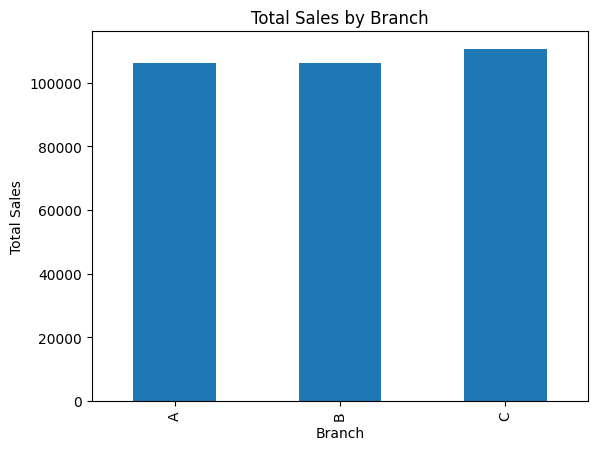

In [8]:
#Find out which branch is generating the highest revenue
data.groupby("Branch")["Total"].sum().plot(kind="bar", title="Total Sales by Branch")
plt.ylabel("Total Sales")
plt.show()


# **Customer spending by type**



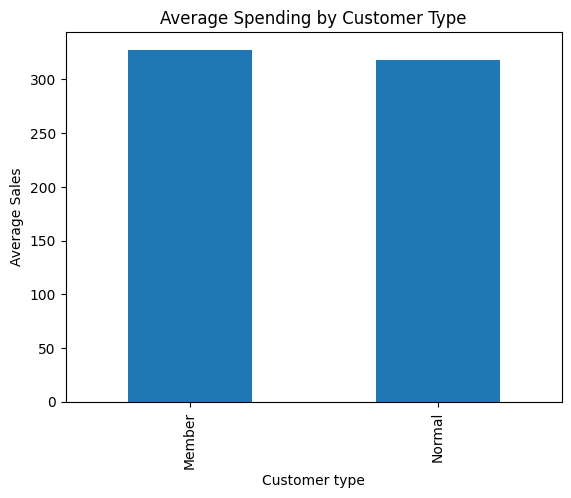

In [9]:
# Compare spending between Members and Normal customers
data.groupby("Customer type")["Total"].mean().plot(kind="bar", title="Average Spending by Customer Type")
plt.ylabel("Average Sales")
plt.show()


# **Sales by hour**

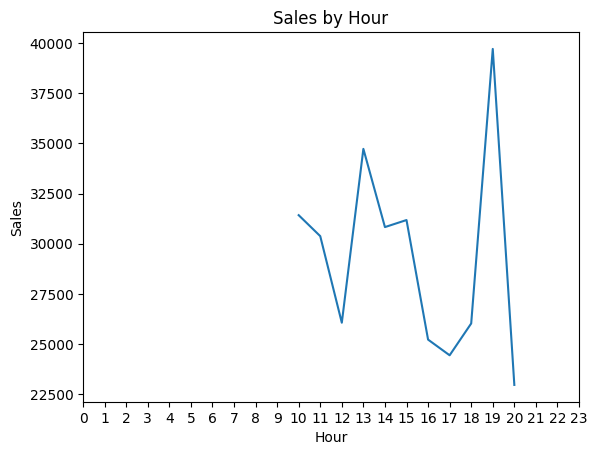

In [10]:
#Identify peak hours for customer purchases
data.groupby("Hour")["Total"].sum().plot(kind="line", title="Sales by Hour")
plt.xticks(range(24))
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.show()


# **Product line analysis**

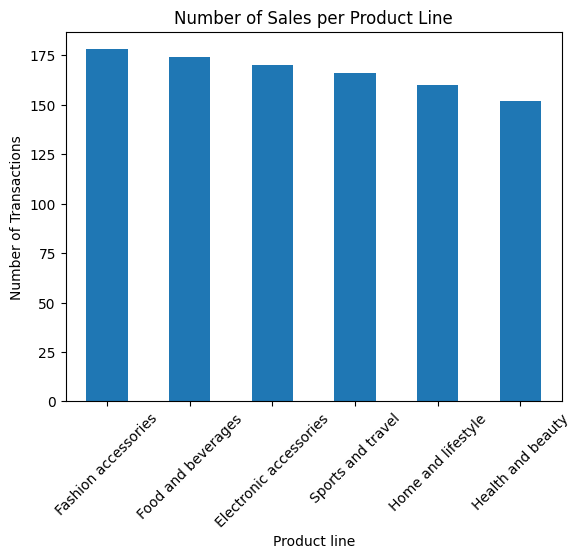

In [11]:
# Which product lines are sold the most and which bring the most profit?

data["Product line"].value_counts().plot(kind="bar", title="Number of Sales per Product Line")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


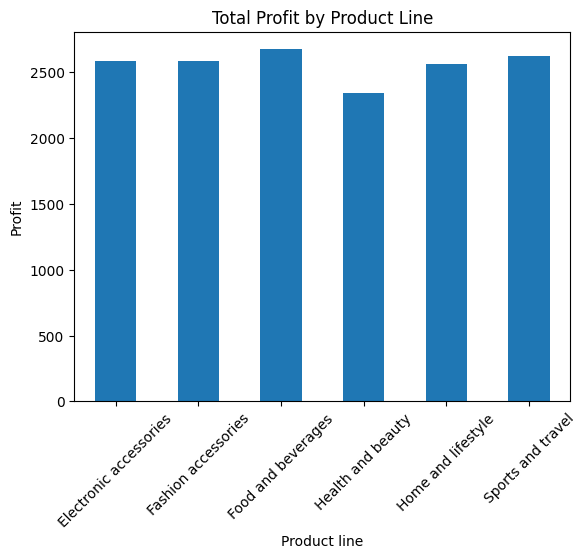

In [13]:
data.groupby("Product line")["gross income"].sum().plot(kind="bar", title="Total Profit by Product Line")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()


# **Payment method analysis**



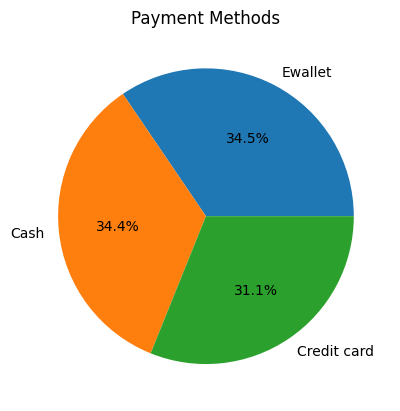

In [14]:
#Visualize customer preferences for payment methods.
data["Payment"].value_counts().plot(kind="pie", autopct='%1.1f%%', title="Payment Methods")
plt.ylabel("")
plt.show()


# **Customer rating vs. spending**


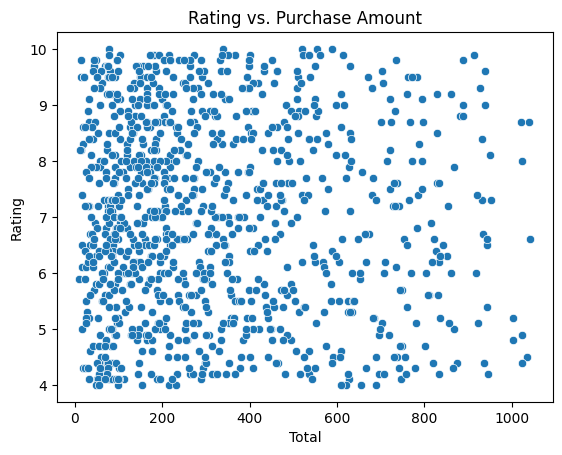

In [15]:
# Check if there’s any correlation between how much customers spend and their satisfaction rating.
sns.scatterplot(x="Total", y="Rating", data=data)
plt.title("Rating vs. Purchase Amount")
plt.xlabel("Total")
plt.ylabel("Rating")
plt.show()


# **Encoder**

In [16]:
label_encoder = LabelEncoder()
data['Branch'] = label_encoder.fit_transform(data['Branch'])
data['City'] = label_encoder.fit_transform(data['City'])
data['Customer type'] = label_encoder.fit_transform(data['Customer type'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Product line'] = label_encoder.fit_transform(data['Product line'])
data['Payment'] = label_encoder.fit_transform(data['Payment'])
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Day
0,750-67-8428,0,2,0,0,3,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,2,522.83,4.761905,26.1415,9.1,13,Saturday
1,226-31-3081,2,1,1,0,0,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,0,76.40,4.761905,3.8200,9.6,10,Friday
2,631-41-3108,0,2,1,1,4,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,1,324.31,4.761905,16.2155,7.4,13,Sunday
3,123-19-1176,0,2,0,1,3,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,2,465.76,4.761905,23.2880,8.4,20,Sunday
4,373-73-7910,0,2,1,1,5,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,2,604.17,4.761905,30.2085,5.3,10,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,1,1,1,3,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,2,40.35,4.761905,2.0175,6.2,13,Tuesday
996,303-96-2227,1,0,1,0,4,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,2,973.80,4.761905,48.6900,4.4,17,Saturday
997,727-02-1313,0,2,0,1,2,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,0,31.84,4.761905,1.5920,7.7,13,Saturday
998,347-56-2442,0,2,1,1,4,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,0,65.82,4.761905,3.2910,4.1,15,Friday


# **Standard Scaler**

In [17]:
scaler = StandardScaler()
data['Unit price'] = scaler.fit_transform(data[['Unit price']])
data['Quantity'] = scaler.fit_transform(data[['Quantity']])
data['Tax 5%'] = scaler.fit_transform(data[['Tax 5%']])
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Day
0,750-67-8428,0,2,0,0,3,0.718160,0.509930,0.919607,548.9715,2019-01-05,13:08:00,2,522.83,4.761905,26.1415,9.1,13,Saturday
1,226-31-3081,2,1,1,0,0,-1.525303,-0.174540,-0.987730,80.2200,2019-03-08,10:29:00,0,76.40,4.761905,3.8200,9.6,10,Friday
2,631-41-3108,0,2,1,1,4,-0.352781,0.509930,0.071446,340.5255,2019-03-03,13:23:00,1,324.31,4.761905,16.2155,7.4,13,Sunday
3,123-19-1176,0,2,0,1,3,0.096214,0.852165,0.675780,489.0480,2019-01-27,20:33:00,2,465.76,4.761905,23.2880,8.4,20,Sunday
4,373-73-7910,0,2,1,1,5,1.156959,0.509930,1.267125,634.3785,2019-02-08,10:37:00,2,604.17,4.761905,30.2085,5.3,10,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,1,1,1,3,-0.578600,-1.543480,-1.141750,42.3675,2019-01-29,13:46:00,2,40.35,4.761905,2.0175,6.2,13,Tuesday
996,303-96-2227,1,0,1,0,4,1.574989,1.536635,2.846340,1022.4900,2019-03-02,17:16:00,2,973.80,4.761905,48.6900,4.4,17,Saturday
997,727-02-1313,0,2,0,1,2,-0.899958,-1.543480,-1.178109,33.4320,2019-02-09,13:22:00,0,31.84,4.761905,1.5920,7.7,13,Saturday
998,347-56-2442,0,2,1,1,4,0.383208,-1.543480,-1.032932,69.1110,2019-02-22,15:33:00,0,65.82,4.761905,3.2910,4.1,15,Friday


# **Compute Correlation Matrix**

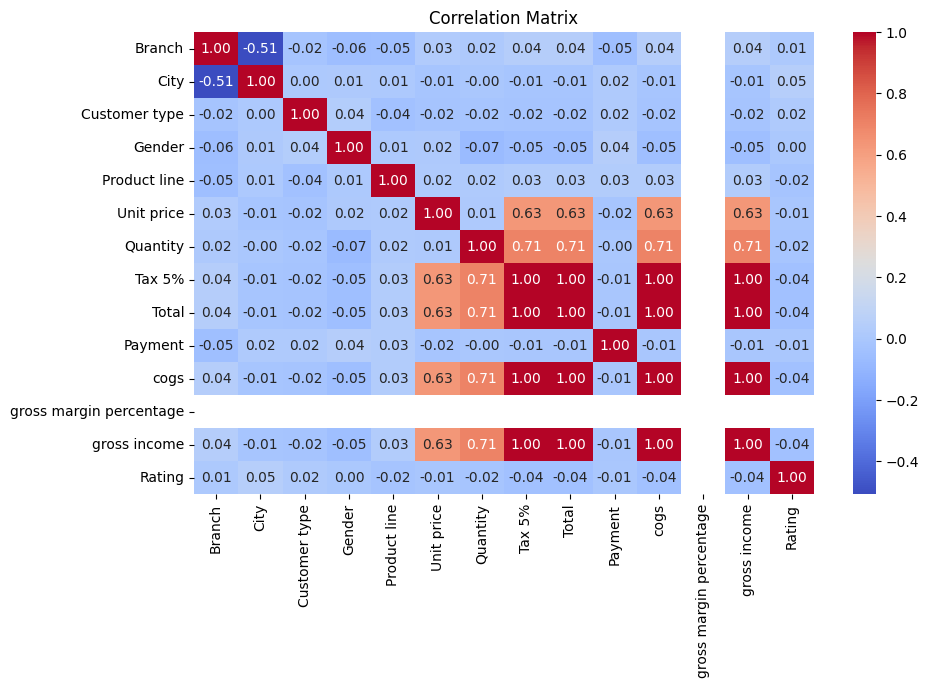

In [21]:
# Select only numeric columns
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# **Compute Correlation and P-value Between Two Variables**


In [23]:
from scipy.stats import pearsonr

# Example: correlation between Total and Gross Income
corr_value, p_value = pearsonr(data["Total"], data["gross income"])

print("Correlation:", corr_value)
print("P-value:", p_value)


Correlation: 1.0
P-value: 0.0


# **Train, Test Split**

In [18]:
#split the data to train and test dataset to use it in the model of ML
train,test = train_test_split(data,test_size = 0.2, random_state = 0)
train

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Day
687,648-83-1321,0,2,0,1,4,0.297865,1.536635,1.401408,667.3800,2019-01-16,17:59:00,0,635.60,4.761905,31.7800,4.3,17,Wednesday
500,277-63-2961,1,0,0,1,5,0.690971,-1.543480,-0.998112,77.6685,2019-02-03,15:53:00,1,73.97,4.761905,3.6985,5.4,15,Sunday
332,566-71-1091,0,2,1,1,1,0.806147,-0.174540,0.331166,404.3550,2019-02-03,15:59:00,0,385.10,4.761905,19.2550,5.5,15,Sunday
979,151-33-7434,1,0,1,0,2,0.456844,-1.543480,-1.024601,71.1585,2019-02-04,20:43:00,1,67.77,4.761905,3.3885,6.5,20,Monday
817,832-51-6761,0,2,1,1,2,-0.822923,0.852165,-0.156146,284.5920,2019-01-19,20:29:00,2,271.04,4.761905,13.5520,9.6,20,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,807-34-3742,0,2,1,1,1,-0.124319,-1.543480,-1.090353,54.9990,2019-03-26,19:44:00,0,52.38,4.761905,2.6190,5.8,19,Tuesday
192,286-43-6208,2,1,1,0,2,1.213225,1.194400,2.061924,829.7100,2019-03-16,19:08:00,0,790.20,4.761905,39.5100,9.2,19,Saturday
629,308-39-1707,0,2,1,0,1,-1.645765,-1.543480,-1.262489,12.6945,2019-01-26,18:19:00,1,12.09,4.761905,0.6045,8.2,18,Saturday
559,218-59-9410,0,2,0,0,4,0.632440,-0.859010,-0.385916,228.1230,2019-03-29,16:54:00,2,217.26,4.761905,10.8630,8.2,16,Friday


In [19]:
test

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Day
993,690-01-6631,1,0,1,1,1,-1.441848,1.536635,-0.566896,183.6450,2019-02-22,18:35:00,2,174.90,4.761905,8.7450,6.6,18,Friday
859,316-66-3011,0,2,0,0,2,-0.303690,1.194400,0.517316,450.1035,2019-01-23,12:35:00,0,428.67,4.761905,21.4335,5.0,12,Wednesday
298,307-83-9164,0,2,0,1,4,0.163808,-0.516775,-0.288591,252.0420,2019-01-25,15:54:00,0,240.04,4.761905,12.0020,4.5,15,Friday
553,399-69-4630,2,1,1,1,0,-1.263610,0.167695,-0.744800,139.9230,2019-03-07,10:23:00,1,133.26,4.761905,6.6630,8.6,10,Thursday
672,576-31-4774,1,0,1,0,3,0.669824,-0.859010,-0.373227,231.2415,2019-03-02,13:10:00,2,220.23,4.761905,11.0115,4.0,13,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,130-67-4723,0,2,0,1,2,-0.270837,0.167695,-0.070868,305.5500,2019-01-11,13:57:00,2,291.00,4.761905,14.5500,9.4,13,Friday
722,776-68-1096,1,0,1,1,4,-0.436236,-0.859010,-0.748645,138.9780,2019-03-18,13:45:00,1,132.36,4.761905,6.6180,7.9,13,Monday
215,802-43-8934,0,2,1,1,4,-1.412016,-1.543480,-1.236043,19.1940,2019-03-22,15:05:00,1,18.28,4.761905,0.9140,8.3,15,Friday
653,149-15-7606,1,0,0,1,5,-0.693020,1.194400,0.120878,352.6740,2019-03-06,15:31:00,2,335.88,4.761905,16.7940,5.1,15,Wednesday
